In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib notebook

# 8.3-8.4 Quantification (gonzalo)

In [2]:
data1 = pd.read_csv("S:\\LAB_MT\\RESULTADOS\\MiQuel\\Embryos\\MS_TL_19-05-18_e116_CBF-H2BVenus_RERTtdtomato\\Results_1.csv") 
data2 = pd.read_csv("S:\\LAB_MT\\RESULTADOS\\MiQuel\\Embryos\\MS_TL_19-05-18_e116_CBF-H2BVenus_RERTtdtomato\\Results2.csv") 


In [3]:
t_pos1 = data1.iloc[-1,1]   #total CBFVenus positive endocardial cells
t_neg1 = data1.iloc[-1,2]    #total CBFVenus negative endocardial cells

t_pos2 = data2.iloc[-1,1]    #total CBFVenus negative endocardial cells
t_neg2 = data2.iloc[-1,2]    #total CBFVenus negative endocardial cells

In [4]:
a = [t_pos1,t_pos2] #positive cells from both samples
b = [t_neg1,t_neg2] #negative cells from both samples

## Ploting total number of positive and negative cells (white background)

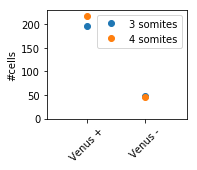

In [5]:
fig = plt.figure(figsize=(5.5, 2))
ax = fig.add_subplot(1, 2, 1)
plt.xticks([0.33, 0.66], rotation = '45')

ax.plot(([0.33,0.66]), (a[0],b[0]), 'o', label = '3 somites')
ax.plot(([0.33,0.66]), (a[1],b[1]),'o', label = '4 somites')
ax.set_ylim(0,230)
ax.set_xticks([0.33, 0.66])
ax.set_xlim(0.1,0.9)

ax.tick_params(axis='x')
ax.tick_params(axis='y')
ax.set_ylabel('#cells')


ax.legend()

ax.set_xticklabels(['Venus +', 'Venus -'])


#plt.savefig('test7.png',  format='png', dpi=1000, bbox_inches = 'tight', transparent = True)

plt.show()

In [74]:
(float(a[0] + b[0])/float(a[1] + b[1]))*100


93.51145038167938

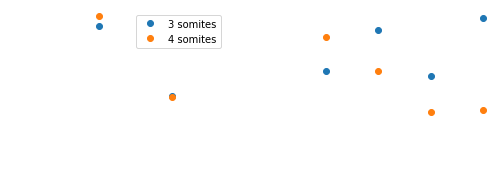

In [65]:
fig = plt.figure(figsize=(8, 2))
ax = fig.add_subplot(1, 2, 1)
plt.xticks([0.33, 0.66], rotation = '45')

ax.plot(([0.33,0.66]), (a[0],b[0]), 'o', label = '3 somites')
ax.plot(([0.33,0.66]), (a[1],b[1]),'o', label = '4 somites')
ax.set_ylim(0,230)
ax.set_xticks([0.33, 0.66])
ax.set_xlim(0.1,0.9)

ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.set_ylabel('#cells').set_color('white')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')

ax.legend()

ax.set_xticklabels(['Venus +', 'Venus -'])


#plt.savefig('test7.png',  format='png', dpi=1000, bbox_inches = 'tight', transparent = True)

ax = fig.add_subplot(1, 2, 2)

ax.scatter([1,2,3,4], [zrange_ratio1[i] for i in sorted(zrange_ratio1.keys())], label = 'E8.25')
ax.scatter([1,2,3,4], [zrange_ratio2[i] for i in sorted(zrange_ratio2.keys())], label = 'E8.4')


ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.set_ylabel('#Venus +/#Venus -').set_color('white')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=None)

#ax.legend()


plt.savefig('test8.png',  format='png', dpi=1000, bbox_inches = 'tight', transparent = True)


## Ploting the position of these cells in z

C-pos in the csv means z pos

In [7]:
data1_wot = data1[:-1] #data without totals row
data2_wot = data2[:-1] #data without totals row

### Manually generate 4 z intervals to calculate the -/+ ratio on those
<br>
look at the data and determine where the heart starts and ends. The ending (outflow is the first z)

In [8]:
start_stack1 = 113 #found by looking at the image. 3 slices before the first endocardial cell is located
start_stack2 = 270 #found by looking at the image. 3 slices before the first endocardial cell is located
outflow1 = 0
outflow2 = 43 #found by looking at the image. 

this is the total z stack, but we don't want to take this into account. just the first and the 270

In [9]:
print data1_wot.iloc[-1]['C-pos'] - data1_wot.iloc[0]['C-pos']
print data2_wot.iloc[-1]['C-pos'] - data2_wot.iloc[0]['C-pos']

203.0
463.0


In [10]:
width1 = int(start_stack1 - outflow1) #this our real endocardium width
chunk1 = width1/4 #we want to have 4 ranges

width2 = int(start_stack2 - outflow2) #this our real endocardium width
chunk2 = width2/4 #we want to have 4 ranges

In [11]:
intervals1 = range(0, width1, chunk1)
print intervals1 # the next cell will wount cells between the stacks 0 and 67
#and calculate the -+ ratio over the different chunks

intervals2 = range(0, width2, chunk2)
print intervals2 # the next cell will wount cells between the stacks 0 and 67
#and calculate the -+ ratio over the different chunks

[0, 28, 56, 84, 112]
[0, 56, 112, 168, 224]


In [12]:
zrange_ratio1 = {}

for i in range(len(intervals1[0:-1])):
    zrange_ratio1[intervals1[i+1]] = 0
    type1 = float(0)
    type2 = float(0)
    
    for index, row in data2_wot.iterrows():
        if intervals1 [i] <= row['C-pos'] <= intervals1 [i+1]:
            #print 'yes'
            type1 += int(row['Type 1'])
            type2 += int(row['Type 2'])
    zrange_ratio1[intervals1[i+1]] = type2/type1

In [13]:
zrange_ratio2 = {}

for i in range(len(intervals2[0:-1])):
    zrange_ratio2[intervals2[i+1]] = 0
    type1 = float(0)
    type2 = float(0)
    
    for index, row in data2_wot.iterrows():
        if intervals2 [i] <= row['C-pos'] <= intervals2 [i+1]:
            #print 'yes'
            type1 += int(row['Type 1'])
            type2 += int(row['Type 2'])
    zrange_ratio2[intervals2[i+1]] = type2/type1


In [35]:
zrange_ratio1

{28: 0.5, 56: 0.8888888888888888, 84: 0.45454545454545453, 112: 1.0}

In [ ]:
 c=color, s=scale, label=color,
               alpha=0.3, edgecolors='none'

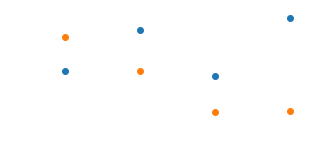

In [55]:
fig = plt.figure(figsize=(10, 2))

ax = fig.add_subplot(1, 2, 2)

ax.scatter([1,2,3,4], [zrange_ratio1[i] for i in sorted(zrange_ratio1.keys())], label = 'E8.25')
ax.scatter([1,2,3,4], [zrange_ratio2[i] for i in sorted(zrange_ratio2.keys())], label = 'E8.4')


ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.set_ylabel('#cells').set_color('white')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')



#ax.legend()


plt.savefig('test8.png',  format='png', dpi=1000, bbox_inches = 'tight', transparent = True)


# 7.8-8 quantification  (CBFVenus at the end of the videos are endothelial CD31 cells)

In [39]:
data = pd.ExcelFile("S:\LAB_MT\RESULTADOS\MiQuel\Embryos\CellCounter_CD31_CBFVenus.xlsx")

### Explainatory examples

In [40]:
# Last row give us the important info. This excel contains 3 sheets. one for embryo
data.sheet_names

['1', '2', '3']

In [46]:
#Select a specific sheet
e1 = data.parse(1,header=None)

In [123]:
e1.iat[-1,0] #select value 0 of the last row. you could also this by ussing e1.iloc[[-1],[0]]

120.0

### plotting

In [117]:
e1 = data.parse(0,header=None) 
e2 = data.parse(1,header=None)
e3 = data.parse(2,header=None)

In [125]:
positives = np.array([e1.iat[-1,0], e2.iat[-1,0],e3.iat[-1,0]])

In [127]:
negatives = np.array([e1.iat[-1,1], e2.iat[-1,1],e3.iat[-1,1]])

In [128]:
total = positives + negatives

In [130]:
percent_pos = positives/total * 100

In [131]:
percent_pos

array([80.        , 88.8       , 91.07981221])

In [133]:
percent_pos.mean()

86.62660406885759

In [138]:
#STATS
import scipy.stats

In [140]:
scipy.stats.mstats.describe(percent_pos)

DescribeResult(nobs=array(3, dtype=int64), minmax=(masked_array(data=80.,
             mask=False,
       fill_value=1e+20), masked_array(data=91.07981221,
             mask=False,
       fill_value=1e+20)), mean=86.62660406885759, variance=22.822198025573005, skewness=masked_array(data=-0.5882564,
             mask=False,
       fill_value=1e+20), kurtosis=-1.5)

In [143]:
import math

In [144]:
math.sqrt(percent_pos.var())

4.7772584214770095

In [ ]:
## wait for higher N

{'whiskers': [<matplotlib.lines.Line2D at 0x19b158f5e10>,
 'caps': [<matplotlib.lines.Line2D at 0x19b15b65710>,
 'boxes': [<matplotlib.lines.Line2D at 0x19b158f5cc0>,
 'medians': [<matplotlib.lines.Line2D at 0x19b15b65ef0>,
 'fliers': [<matplotlib.lines.Line2D at 0x19b15b87358>,
 'means': []}

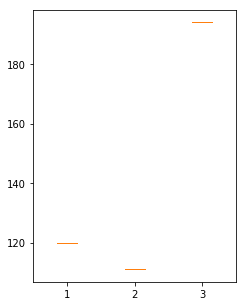

In [86]:
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(1, 2, 1)
# ax.violinplot([end_to_end, mes_to_mes, end_to_mes], showextrema=False)
ax.boxplot(positives)
#ax.set_xticks([1, 2, 3])
#ax.set_xticklabels(['end to end', 'mes to mes', 'end to mes'])
#ax.set_ylim(0, 2.5)
#ax.set_title('ALL t1-t15')
#ax.set_ylabel('distance increment every 5 minutes (um)')